<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/nuclear_fusion_reconn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

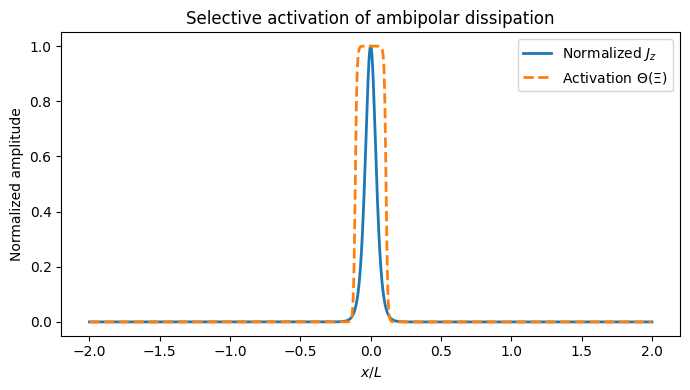

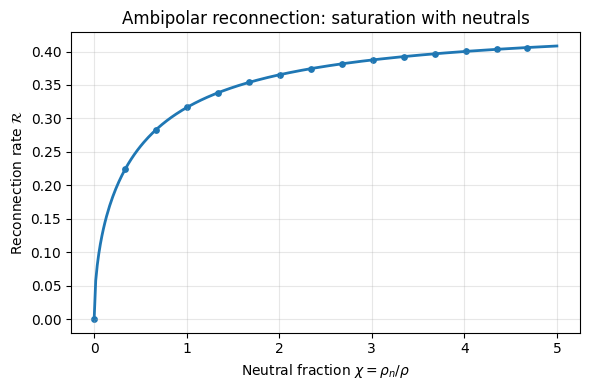

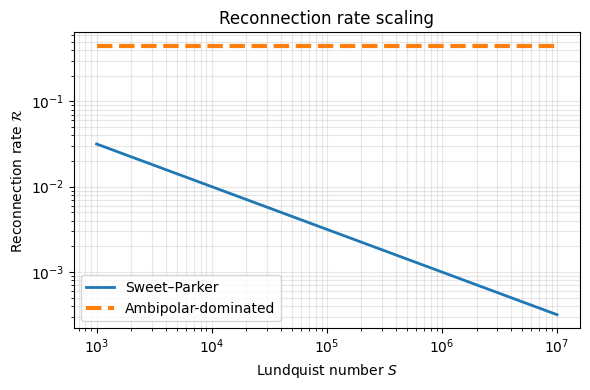

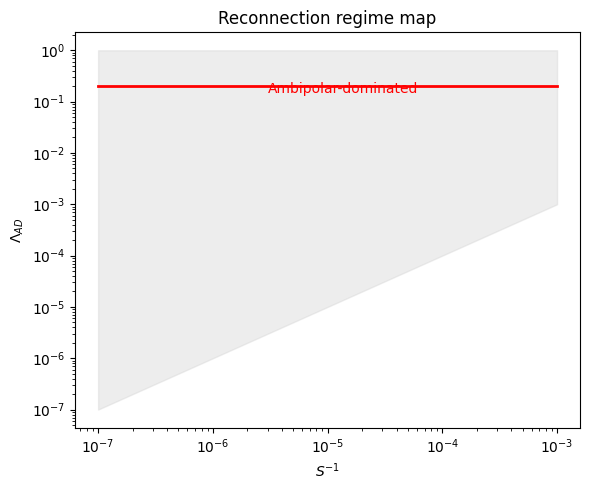

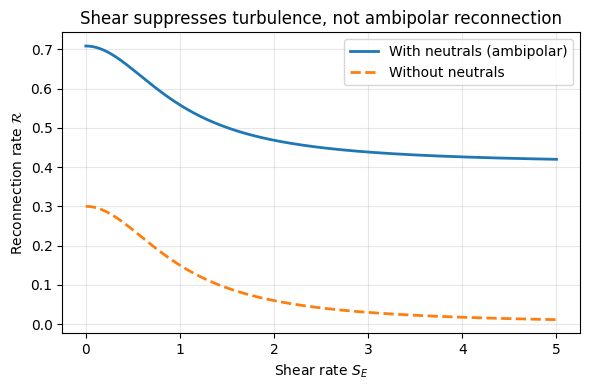

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Physical parameters
# =========================
mu0 = 1.0
rho = 1.0
B0  = 1.0
VA  = B0/np.sqrt(mu0*rho)

L   = 1.0          # macroscopic current-sheet length
nu_in = 5.0        # ion-neutral collision frequency
delta0 = 0.05      # current-sheet half-thickness

B_eps = 1e-3       # small guide-field regularization

# Lundquist numbers (for SP comparison)
S = np.logspace(3,7,60)

# Spatial grid (normalized by L)
x = np.linspace(-2,2,1200)

# =========================
# Current-sheet profiles
# =========================
def By(x, delta):
    return B0*np.tanh(x/delta)

def Jz(x, delta):
    return (B0/(mu0*delta))*1/np.cosh(x/delta)**2

# =========================
# Geometry-aware activation
# =========================
def Xi(x, delta):
    return L*np.abs(Jz(x,delta))/np.sqrt(By(x,delta)**2 + B_eps**2)

def Theta(x, delta, m=4):
    xi = Xi(x,delta)
    return xi**m/(1+xi**m)

# =========================
# FIGURE 1 — selective activation
# =========================
J_norm = Jz(x,delta0)/np.max(Jz(x,delta0))

plt.figure(figsize=(7,4))
plt.plot(x, J_norm, linewidth=2, label=r'Normalized $J_z$')
plt.plot(x, Theta(x,delta0), '--', linewidth=2,
         label=r'Activation $\Theta(\Xi)$')
plt.xlabel(r'$x/L$')
plt.ylabel('Normalized amplitude')
plt.legend()
plt.title('Selective activation of ambipolar dissipation')
plt.tight_layout()
plt.show()

# =========================
# FIGURE 2 — neutral fraction scaling
# =========================
chi = np.linspace(0,5,300)
Phi = chi/(1+chi)

R_amb = VA*np.sqrt(VA/(nu_in*L)*Phi)

plt.figure(figsize=(6,4))
plt.plot(chi, R_amb, linewidth=2)
plt.scatter(chi[::20], R_amb[::20], s=15)
plt.xlabel(r'Neutral fraction $\chi=\rho_n/\rho$')
plt.ylabel(r'Reconnection rate $\mathcal{R}$')
plt.title('Ambipolar reconnection: saturation with neutrals')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# FIGURE 3 — Sweet–Parker vs ambipolar
# =========================
R_SP = VA/np.sqrt(S)
R_AD = VA*np.sqrt(VA/(nu_in*L)) * np.ones_like(S)

plt.figure(figsize=(6,4))
plt.loglog(S, R_SP, linewidth=2, label='Sweet–Parker')
plt.loglog(S, R_AD, '--', linewidth=3, label='Ambipolar-dominated')
plt.xlabel('Lundquist number $S$')
plt.ylabel(r'Reconnection rate $\mathcal{R}$')
plt.legend()
plt.title('Reconnection rate scaling')
plt.grid(which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# FIGURE 5 — regime map
# =========================
Lambda_AD = VA/(nu_in*L)
SP_inv = 1/S

plt.figure(figsize=(6,5))
plt.loglog(SP_inv, Lambda_AD*np.ones_like(SP_inv),
           'r', linewidth=2)
plt.fill_between(SP_inv, SP_inv, 1,
                 color='lightgray', alpha=0.4)
plt.xlabel(r'$S^{-1}$')
plt.ylabel(r'$\Lambda_{AD}$')
plt.title('Reconnection regime map')
plt.text(3e-6,0.15,'Ambipolar-dominated',color='r')
plt.tight_layout()
plt.show()

# =========================
# FIGURE 4 — shear vs reconnection
# =========================
SE = np.linspace(0,5,300)

R_turb = 0.30
S0 = 1.0

R_with_neutrals = R_amb[-1] + R_turb/(1+(SE/S0)**2)
R_no_neutrals   = R_turb/(1+(SE/S0)**2)

plt.figure(figsize=(6,4))
plt.plot(SE, R_with_neutrals, linewidth=2,
         label='With neutrals (ambipolar)')
plt.plot(SE, R_no_neutrals, '--', linewidth=2,
         label='Without neutrals')
plt.xlabel(r'Shear rate $S_E$')
plt.ylabel(r'Reconnection rate $\mathcal{R}$')
plt.legend()
plt.title('Shear suppresses turbulence, not ambipolar reconnection')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
